# **RNN**
A recurrent neural network (RNN) is a class of artificial neural network where connections between units form a directed cycle. This creates an internal state of the network which allows it to exhibit dynamic temporal behavior.

IMDB sentiment classification task

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. IMDB provided a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided.

You can download the dataset from http://ai.stanford.edu/~amaas/data/sentiment/  or you can directly use 
" from keras.datasets import imdb " to import the dataset.

Few points to be noted:
Modules like SimpleRNN, LSTM, Activation layers, Dense layers, Dropout can be directly used from keras
For preprocessing, you can use required 

In [1]:
#load the imdb dataset 
from keras.datasets import imdb

vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

17473536/17464789 [==============================] - 0s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples


In [2]:
X_train.shape

(25000,)

In [3]:
#the review is stored as a sequence of integers. 
# These are word IDs that have been pre-assigned to individual words, and the label is an integer

print('---review---')
print(X_train[20])
print('---label---')
print(y_train[20])

# to get the actual review
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[20]])
print('---label---')
print(y_train[20])

---review---
[1, 617, 11, 3875, 17, 2, 14, 966, 78, 20, 9, 38, 78, 15, 25, 413, 2, 5, 28, 8, 106, 12, 8, 4, 130, 43, 8, 67, 48, 12, 100, 79, 101, 433, 5, 12, 127, 4, 769, 9, 38, 727, 12, 186, 398, 34, 6, 312, 396, 2, 707, 4, 732, 26, 1235, 21, 2, 128, 74, 4, 2, 5, 4, 116, 9, 1639, 10, 10, 4, 2, 2, 186, 8, 28, 77, 2586, 39, 4, 4135, 2, 7, 2, 2, 50, 161, 306, 8, 30, 6, 686, 204, 326, 11, 4, 226, 20, 10, 10, 13, 258, 14, 20, 8, 30, 38, 78, 15, 13, 1498, 91, 7, 4, 96, 143, 10, 10, 2, 2, 144, 3261, 27, 419, 11, 902, 29, 540, 887, 4, 278]
---label---
0
1654784/1641221 [==============================] - 0s 0us/step
---review with words---
['the', 'running', 'this', 'lily', 'movie', 'and', 'as', 'monster', 'do', 'on', 'it', 'her', 'do', 'for', 'have', 'lost', 'and', 'to', 'one', 'in', 'character', 'that', 'in', 'of', 'here', 'out', 'in', 'can', 'what', 'that', 'after', 'also', 'think', 'entire', 'to', 'that', 'end', 'of', 'using', 'it', 'her', 'straight', 'that', 'horror', 'keep', 'who', 'is',

In [4]:
#pad sequences (write your code here)
from keras.preprocessing import sequence
max_words = 400
X_train = sequence.pad_sequences(X_train, max_words)
X_test = sequence.pad_sequences(X_test, max_words)

In [5]:
X_train.shape

(25000, 400)

In [7]:
#design a RNN model (write your code)

from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN

model_rnn = Sequential()
model_rnn.add(Embedding(vocabulary_size, 32, input_length=max_words))
model_rnn.add(SimpleRNN(100))
model_rnn.add(Dense(1, activation='sigmoid'))
print(model_rnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 32)           160000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               13300     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 173,401
Trainable params: 173,401
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
batch_size = 100
num_epochs = 5
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]

In [19]:
#train and evaluate your model
#choose your loss function and optimizer and mention the reason to choose that particular loss function and optimizer
# use accuracy as the evaluation metric

model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Adam optimizer has been chosen due to its many convenient properties such as property of learning the learning rates and its robustness to hyperparameters. Adam optimizer also works well on problems with noisy or sparse gradients, and with large data sets and large parameters.

Binary CrossEntropy is used as CE is a good loss measure and since we only have binary labels for reviews (negative and positive), hence binary.

In [21]:
#evaluate the model using model.evaluate()
accuracies = model_rnn.evaluate(X_test, y_test, verbose=0)
print('Test accuracy for Simple RNN:', accuracies[1])

Test accuracy for Simple RNN: 0.7864400148391724


In [20]:
history_rnn = model_rnn.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/5
249/249 [==============================] - 50s 197ms/step - loss: 0.5109 - accuracy: 0.7410 - val_loss: 0.6343 - val_accuracy: 0.6600
Epoch 2/5
249/249 [==============================] - 49s 196ms/step - loss: 0.4257 - accuracy: 0.8095 - val_loss: 0.4817 - val_accuracy: 0.8000
Epoch 3/5
249/249 [==============================] - 49s 196ms/step - loss: 0.3960 - accuracy: 0.8216 - val_loss: 0.6423 - val_accuracy: 0.6900
Epoch 4/5
249/249 [==============================] - 49s 196ms/step - loss: 0.4116 - accuracy: 0.8135 - val_loss: 0.6634 - val_accuracy: 0.6800
Epoch 5/5
249/249 [==============================] - 49s 196ms/step - loss: 0.4077 - accuracy: 0.8172 - val_loss: 0.4248 - val_accuracy: 0.8700


# **LSTM**

Instead of using a RNN, now try using a LSTM model and compare both of them. Which of those performed better and why ?


In [22]:
model_lstm = Sequential()
model_lstm.add(Embedding(vocabulary_size, 32, input_length=max_words))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(1, activation='sigmoid'))
print(model_lstm.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 400, 32)           160000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history_lstm = model_lstm.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/5
249/249 [==============================] - 179s 711ms/step - loss: 0.4939 - accuracy: 0.7609 - val_loss: 0.4021 - val_accuracy: 0.8700
Epoch 2/5
249/249 [==============================] - 177s 710ms/step - loss: 0.3206 - accuracy: 0.8690 - val_loss: 0.3030 - val_accuracy: 0.8900
Epoch 3/5
249/249 [==============================] - 177s 713ms/step - loss: 0.2466 - accuracy: 0.9035 - val_loss: 0.2251 - val_accuracy: 0.9300
Epoch 4/5
249/249 [==============================] - 184s 739ms/step - loss: 0.2095 - accuracy: 0.9200 - val_loss: 0.2415 - val_accuracy: 0.9000
Epoch 5/5
249/249 [==============================] - 188s 755ms/step - loss: 0.1949 - accuracy: 0.9266 - val_loss: 0.1898 - val_accuracy: 0.9500


In [25]:
#evaluate the model using model.evaluate()
accuracies = model_lstm.evaluate(X_test, y_test, verbose=0)
print('Test accuracy for LSTM:', accuracies[1])

Test accuracy for LSTM: 0.8711599707603455


LSTM performs better than SimpleRNN as LSTMs hold on to the information longer in their memory and hence are able to learn long-term dependencies. They can also deal with the exploding and vanishing gradients, allowing them to maintain a long-range flow of gradients. These properties make LSTM better than a simple unit

Perform Error analysis and explain using few examples.

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import islice

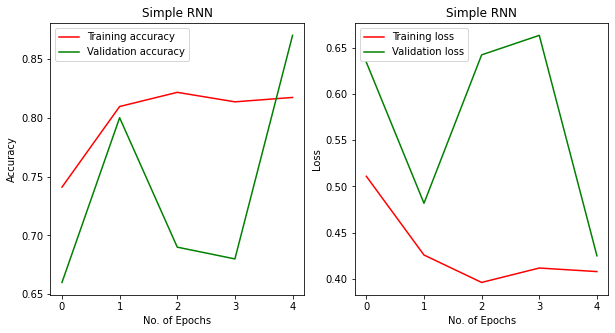

In [48]:
fig, axis = plt.subplots(1,2, figsize = (10,5))
axis[0].plot(history_rnn.history['accuracy'], 'r', label='Training accuracy')
axis[0].plot(history_rnn.history['val_accuracy'], 'g', label='Validation accuracy')
axis[0].set_xlabel('No. of Epochs')
axis[0].set_title("Simple RNN")
axis[0].set_ylabel('Accuracy')
axis[0].legend()

axis[1].plot(history_rnn.history['loss'], 'r', label='Training loss')
axis[1].plot(history_rnn.history['val_loss'], 'g', label='Validation loss')
axis[1].set_xlabel('No. of Epochs')
axis[1].set_title("Simple RNN")
axis[1].set_ylabel('Loss')
axis[1].legend()

plt.show()

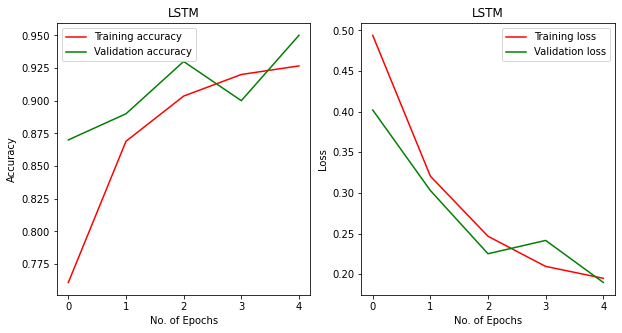

In [47]:
fig, axis = plt.subplots(1,2, figsize = (10,5))
axis[0].plot(history_lstm.history['accuracy'], 'r', label='Training accuracy')
axis[0].plot(history_lstm.history['val_accuracy'], 'g', label='Validation accuracy')
axis[0].set_xlabel('No. of Epochs')
axis[0].set_title("LSTM")
axis[0].set_ylabel('Accuracy')
axis[0].legend()

axis[1].plot(history_lstm.history['loss'], 'r', label='Training loss')
axis[1].plot(history_lstm.history['val_loss'], 'g', label='Validation loss')
axis[1].set_xlabel('No. of Epochs')
axis[1].set_title("LSTM")
axis[1].set_ylabel('Loss')
axis[1].legend()

plt.show()

In [29]:
word_index = imdb.get_word_index()
print("Word dictionary")
list(islice(word_index.items(), 20))

Word dictionary


[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951),
 ('woods', 1408),
 ('spiders', 16115),
 ('hanging', 2345),
 ('woody', 2289),
 ('trawling', 52008),
 ("hold's", 52009),
 ('comically', 11307),
 ('localized', 40830),
 ('disobeying', 30568),
 ("'royale", 52010),
 ("harpo's", 40831),
 ('canet', 52011),
 ('aileen', 19313),
 ('acurately', 52012),
 ("diplomat's", 52013)]

In [30]:
def get_review(reviews):
    reverse_index = dict([(v, k) for (k, v) in imdb.get_word_index().items()])
    review = " ".join([reverse_index.get(r-3, "_") for r in reviews])
    return review

In [43]:
np.random.seed(17)
i = np.random.choice(20000, 10, replace=False)

samples = X_test[i, :]
labels = y_test[i]

actual_labels = []

print('Reviews\n')
l = 0
for reviews in samples:
    r = get_review(reviews) 
    print(r.strip("_ "))
    if labels[l] != 1:
        print("(Negative)\n")
        actual_labels.append("Negative")
    else:
      print("(Positive)\n")
      actual_labels.append("Positive")
        
    l = l + 1

Reviews

look some film has got to the be worst ever i suggest it may be india song when i saw the film in _ it was playing at the _ hall cinema a place _ by people who care a lot about film from about the halfway point people were simply _ out of the theater my girlfriend wouldn't let us leave but by the end the theater was virtually empty i kept telling people as they left that the good part is still to come and it was the good part was the screen at the end that said _ it was the only good part i am still annoyed by this film 24 years later it was pointless stupid and _ _ part 2 see it only if you want to spend an endless two hours learning to _ between merely bad and simply awful
(Negative)

the video case for this film reads a story of beauty passion and forbidden _ are they talking about the same movie i just saw they can't be as the film i just saw was beautiful but there was no passion and as for the _ this is all _ meant to _ the potential viewer to see this movie if only it d

In [44]:
labels_rnn = model_rnn.predict(samples)
labels_rnn[labels_rnn >= 0.5] = 1
labels_rnn[labels_rnn < 0.5] = 0

labels_lstm = model_lstm.predict(samples)
labels_lstm[labels_lstm >= 0.5] = 1
labels_lstm[labels_lstm < 0.5] = 0

print("Actual Labels:")
for i in actual_labels:
    print(i,end='; ')

print("\n\nPredictions using RNN :")
for i in labels_rnn:
    if i != i:
        print(" Negative",end=';')
    else:
        print(" Positive",end=';')

print("\n\nPredictions using LSTM:")
for i in labels_lstm:
    if i != 1:
        print(" Negative",end=';')
    else:
        print(" Positive",end=';')


Actual Labels:
Negative; Negative; Negative; Positive; Positive; Positive; Negative; Negative; Positive; Positive; 

Predictions using RNN :
 Positive; Positive; Positive; Positive; Positive; Positive; Positive; Positive; Positive; Positive;

Predictions using LSTM:
 Negative; Negative; Negative; Positive; Positive; Negative; Negative; Negative; Positive; Positive;

As can be observed, LSTM performs better than Simple RNN. LSTM predicts 9/10 correctly for this sample, whereas Simple RNN only predicts 5/10 correctly.